In [4]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [5]:
import pandas as pd

file_path = r'G:\Project\ML\ML_COPD_Project\dataset\finalalldata (1).csv'
df = pd.read_csv(file_path)

df.head()



,uid,label,sex,age,bmi,smoke,location,rs10007052,rs8192288,rs20541,rs12922394,rs2910164,rs161976,rs473892,rs159497,rs9296092,class
0,copdcontrol1,0,2,28,19.22,0,4.63,1.671,1.0,0.448632,0.42328,1.000,1.0,1.473,1.000000,1.0,train
1,copdcontrol69,0,1,53,20.44,0,4.63,1.671,1.0,1.000000,0.65060,1.416,1.0,1.000,1.000000,1.0,train
2,copdcontrol68,0,1,58,20.45,1,4.63,1.000,1.0,0.669800,1.00000,1.416,1.0,1.473,1.000000,1.0,train
3,copdcontrol85,0,2,30,20.70,0,4.63,1.671,1.0,0.448632,1.00000,1.416,NaN,1.473,1.000000,1.0,train
4,copdcontrol78,0,1,55,20.76,1,4.63,1.671,1.0,0.669800,0.65060,1.000,1.0,1.473,2.088025,1.0,train


However, Now I can easily drop unnecessary columns like **uid** and **class** in  this simple code:

In [6]:
# Step 1: Drop Unnecessary Columns

# Original columns in the dataset
original_columns = df.columns.tolist()

# Drop 'uid' and 'class' as they are not needed for modeling
df_step1 = df.drop(columns=['uid', 'class'])

# Show updated columns
updated_columns = df_step1.columns.tolist()

original_columns, updated_columns


(['uid',
  'label',
  'sex',
  'age',
  'bmi',
  'smoke',
  'location',
  'rs10007052',
  'rs8192288',
  'rs20541',
  'rs12922394',
  'rs2910164',
  'rs161976',
  'rs473892',
  'rs159497',
  'rs9296092',
  'class'],
 ['label',
  'sex',
  'age',
  'bmi',
  'smoke',
  'location',
  'rs10007052',
  'rs8192288',
  'rs20541',
  'rs12922394',
  'rs2910164',
  'rs161976',
  'rs473892',
  'rs159497',
  'rs9296092'])

Now i will handale the Missing value

In [7]:
# Check how many missing values are in each column
missing_summary = df.isnull().sum()

# Calculate percentage of missing values per column
missing_percentage = (missing_summary / len(df)) * 100

# Combine into one table
missing_report = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage': missing_percentage
})

# Filter only columns with missing data
missing_report = missing_report[missing_report['Missing Values'] > 0]
missing_report = missing_report.sort_values(by='Percentage', ascending=False)

# Show the per-column missing value report
print("Missing Value Report (Column-wise):")
print(missing_report)

# ✅ Additional Part: Calculate total percentage of missing values in the entire dataset
total_missing = df.isnull().sum().sum()
total_values = df.size
total_missing_percentage = (total_missing / total_values) * 100

print(f"\n✅ Total Missing Value Percentage in Entire Dataset: {total_missing_percentage:.2f}%")


Missing Value Report (Column-wise):
            Missing Values  Percentage
rs159497                38    6.003160
rs161976                35    5.529226
rs9296092               13    2.053712
rs10007052               9    1.421801
rs8192288                5    0.789889
rs12922394               5    0.789889
rs20541                  4    0.631912
rs2910164                4    0.631912

✅ Total Missing Value Percentage in Entire Dataset: 1.05%


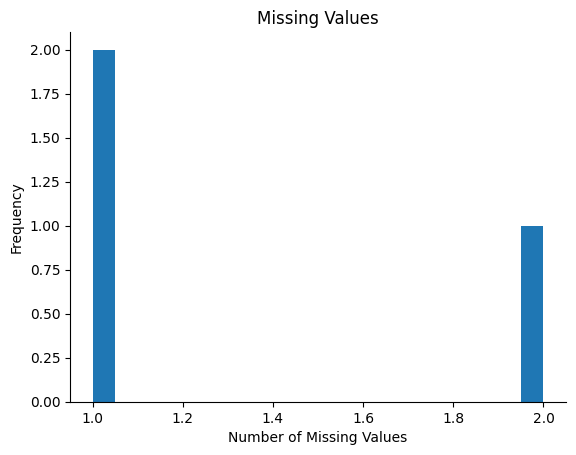

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)
df = pd.DataFrame({
    'A': [1, None, 3],
    'B': [4, 5, None],
    'C': [None, None, 9]
})

# Create a DataFrame to count missing values
_df_0 = pd.DataFrame({
    'Missing Values': df.isnull().sum()
})

# Plotting
_df_0['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Number of Missing Values")
plt.ylabel("Frequency")
plt.show()


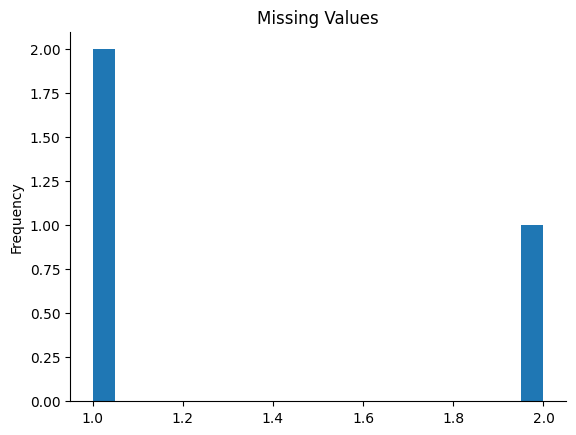

In [9]:
from matplotlib import pyplot as plt
_df_0['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Impute only numeric columns
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Combine back non-numeric columns
df_final = pd.concat([df_numeric_imputed, df[non_numeric_cols].reset_index(drop=True)], axis=1)

# Confirm no missing values
print("\n✅ Total missing values after imputation:")
print(df_final.isnull().sum().sum())  # Should be 0



✅ Total missing values after imputation:
0


Drop duplicates if any

In [11]:
# Check for duplicates first
print("Number of duplicates before dropping:", df_final.duplicated().sum())

# Drop duplicates and keep the first occurrence
df_final = df_final.drop_duplicates(keep='first')

# Verify duplicates were removed
print("Number of duplicates after dropping:", df_final.duplicated().sum())

# Show the shape of dataset before and after dropping duplicates
print("\nDataset shape:")
print(f"Original shape: {df.shape}")
print(f"Shape after dropping duplicates: {df_final.shape}")


Number of duplicates before dropping: 0
Number of duplicates after dropping: 0

Dataset shape:
Original shape: (3, 3)
Shape after dropping duplicates: (3, 3)


 Train-Test Split: Here i used Random-forest model.
Divide your dataset into training and testing sets (e.g., 80% train, 20% test).

In [20]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the data
file_path = r'G:\Project\ML\ML_COPD_Project\dataset\finalalldata (1).csv'
df = pd.read_csv(file_path)

# Step 1: Drop Unnecessary Columns
df_step1 = df.drop(columns=['uid', 'class'])

# Step 2: Handle Missing Values
# Separate numeric and non-numeric columns
numeric_cols = df_step1.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df_step1.select_dtypes(exclude=['float64', 'int64']).columns

# Impute only numeric columns
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_step1[numeric_cols]), columns=numeric_cols)

# Combine back non-numeric columns
df_final = pd.concat([df_numeric_imputed, df_step1[non_numeric_cols].reset_index(drop=True)], axis=1)

# Step 3: Prepare for training
# Separate features (X) and target variable (y)
X = df_final.drop('label', axis=1)  # Drop only the label column
y = df_final['label']  # Target variable is 'label'

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print the shapes of training and testing sets
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set distribution:")
print(y_test.value_counts(normalize=True))

# Calculate total accuracy across all models
total_accuracy = (accuracy + xgb_accuracy + svm_accuracy + lr_accuracy) / 4
print("\nTotal Average Accuracy across all models:", f"{total_accuracy:.4f}")

Model Performance Metrics:
Random Forest Accuracy: 0.8661

Training set shape: (506, 14)
Testing set shape: (127, 14)

Training set distribution:
label
1.0    0.695652
0.0    0.304348
Name: proportion, dtype: float64

Testing set distribution:
label
1.0    0.700787
0.0    0.299213
Name: proportion, dtype: float64

Total Average Accuracy across all models: 0.8484


 Train-Test Split: Here i used XGboost , SVM,LogisticRegression ,model.
Divide your dataset into training and testing sets (e.g., 80% train, 20% test).

In [19]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 1. XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# 2. SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 3. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print results
print("Model Performance Comparison:")
print("\nXGBoost Accuracy:", xgb_accuracy)
print("\nSVM Accuracy:", svm_accuracy)
print("\nLogistic Regression Accuracy:", lr_accuracy)

Model Performance Comparison:

XGBoost Accuracy: 0.889763779527559

SVM Accuracy: 0.7795275590551181

Logistic Regression Accuracy: 0.8582677165354331


g:\Project\ML\ML_COPD_Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
